In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.utils import resample
from pathlib import Path
import random
from sklearn.preprocessing import LabelEncoder



Number of classes: 15
Columns in sampled_images: Index(['Label', 'Filepath', 'Encoded_Label'], dtype='object')


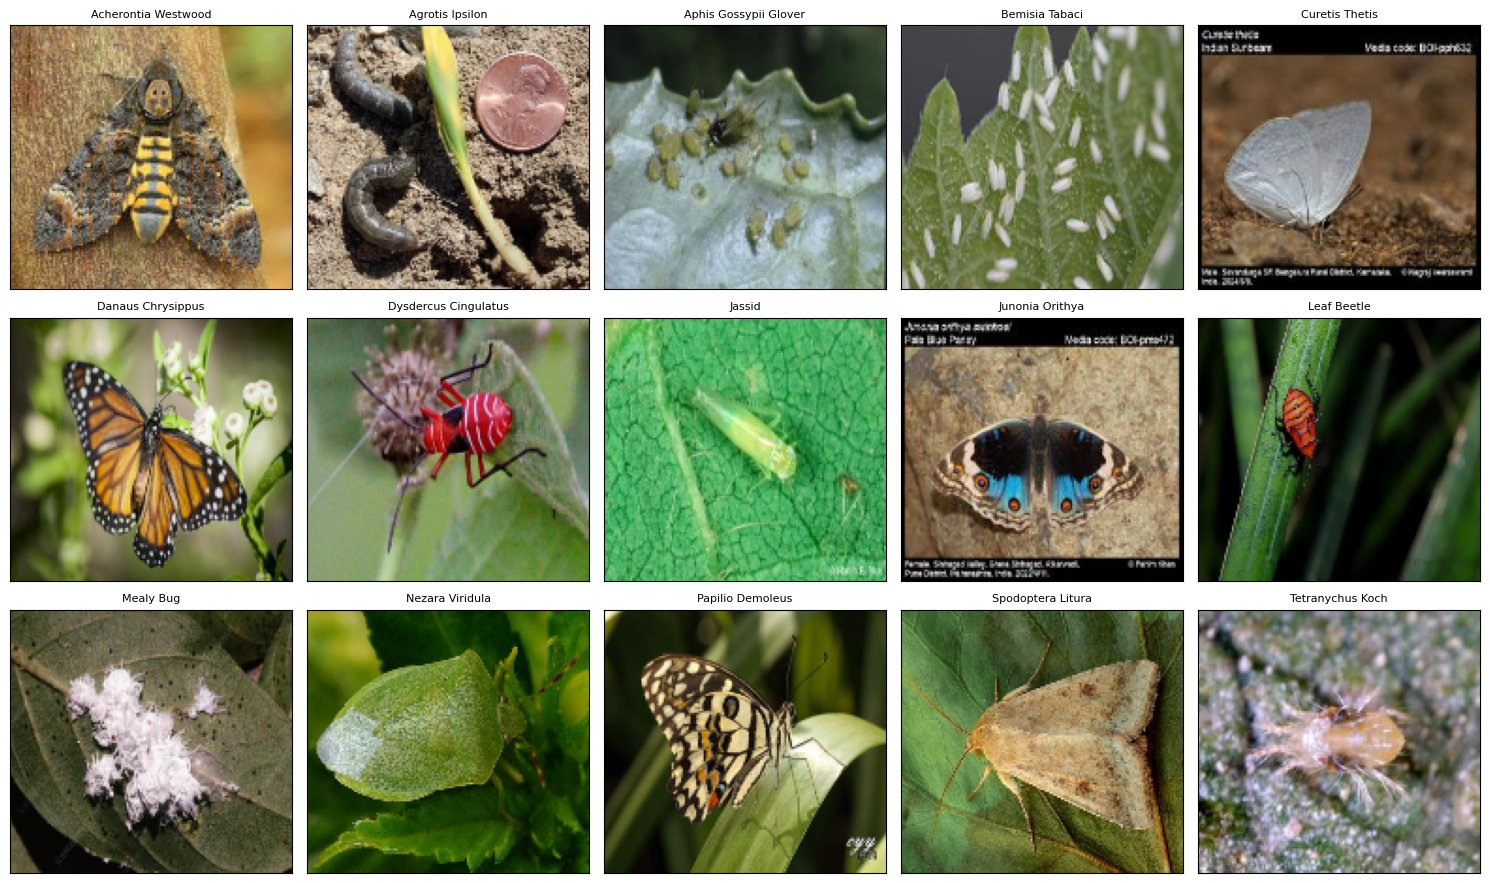

In [34]:
import os
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import cv2  

def load_data(data_path):
    filepaths = []
    labels = []
    
    # Iterate through each folder in the dataset directory (each folder is a class)
    for plant_class in data_path.iterdir():
        if plant_class.is_dir():
            # Get all image files in the class folder
            for image_file in plant_class.iterdir():  # Directly iterate over files inside each class folder
                if image_file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.webp']:
                    filepaths.append(image_file)
                    label = f"{plant_class.name}"  # Class name is the folder name
                    labels.append(label)

    # Create a DataFrame with filepaths and labels
    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df

# Load train and test data
train_dir = Path(r"C:\Users\Apollo Gadget\Documents\Thesis\Medicinal Plant Insect Classification\Code\NewCode\Dataset\train")
test_dir = Path(r"C:\Users\Apollo Gadget\Documents\Thesis\Medicinal Plant Insect Classification\Code\NewCode\Dataset\test")

train_image_df = load_data(train_dir)
test_image_df = load_data(test_dir)

# Encode the labels
label_encoder = LabelEncoder()
train_image_df['Encoded_Label'] = label_encoder.fit_transform(train_image_df['Label'])
test_image_df['Encoded_Label'] = label_encoder.transform(test_image_df['Label'])

# Display the number of classes
num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")

# Sample one image per class for visualization
sampled_images = train_image_df.groupby('Label').first().reset_index()  # Reset index to preserve 'Label' column

# Check the columns in sampled_images to ensure 'Label' is there
print("Columns in sampled_images:", sampled_images.columns)

# Plotting the sampled images
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 9), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = sampled_images.Filepath.iloc[i]
    img = plt.imread(img_path)
    
    # Convert grayscale images to RGB if necessary
    if img.ndim == 2:  
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Resize image to (150, 140)
    img_resized = cv2.resize(img, (150, 140))
    
    # Access the Label column correctly
    ax.set_title(sampled_images.Label.iloc[i], fontsize=8)
    ax.imshow(img_resized)

plt.tight_layout()
plt.show()


In [35]:
# Display the first few rows of the train_image_df
print(train_image_df.head())

# Display the first few rows of the test_image_df
print(test_image_df.head())

label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

for encoded_class, label in label_mapping.items():
    print(f"Class {encoded_class}: {label}")


                                            Filepath                Label  \
0  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   
1  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   
2  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   
3  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   
4  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   

   Encoded_Label  
0              0  
1              0  
2              0  
3              0  
4              0  
                                            Filepath                Label  \
0  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   
1  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   
2  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   
3  C:\Users\Apollo Gadget\Documents\Thesis\Medici...  Acherontia Westwood   
4  C:\Users\Apollo Gadget\Documents\Th

In [60]:
# Combine the image data from both train and test folders
combined_image_df = pd.concat([train_image_df, test_image_df])

# Count the number of images for each class in the combined dataset
class_counts = combined_image_df['Label'].value_counts()

# Print the count of images for each class
print("Total number of images per class (train + test):")
print(class_counts)


Total number of images per class (train + test):
Label
Aphis Gossypii Glover    220
Nezara Viridula          117
Danaus Chrysippus        117
Dysdercus Cingulatus     106
Mealy Bug                105
Bemisia Tabaci           101
Papilio Demoleus         101
Spodoptera Litura        100
Jassid                    88
Leaf Beetle               85
Acherontia Westwood       74
Agrotis Ipsilon           72
Tetranychus Koch          61
Junonia Orithya           55
Curetis Thetis            40
Name: count, dtype: int64


In [37]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    train_image_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    subset='training'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_image_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 1088 validated image filenames belonging to 15 classes.
Found 326 validated image filenames belonging to 15 classes.


C:\Users\Apollo Gadget\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 35 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(
C:\Users\Apollo Gadget\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rescale=1./255,                 
    rotation_range=20,             
    width_shift_range=0.2,       
    height_shift_range=0.2,      
    shear_range=0.15,            
    zoom_range=0.2,               
    horizontal_flip=True,      
    vertical_flip=True,           
    validation_split=0.2       
)

train_generator = datagen.flow_from_dataframe(
    train_image_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),       
    class_mode='categorical',
    batch_size=32,
    subset='training'             
)

# Prepare the validation data generator without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_image_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False                 
)


Found 1088 validated image filenames belonging to 15 classes.
Found 326 validated image filenames belonging to 15 classes.


C:\Users\Apollo Gadget\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 35 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(
C:\Users\Apollo Gadget\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


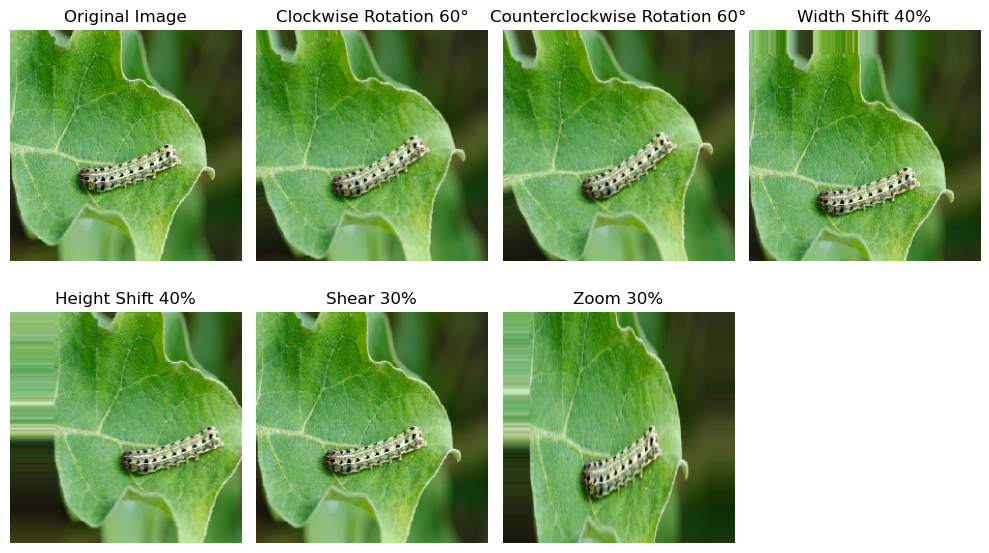

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


sample_image_path = r"C:\Users\Apollo Gadget\Documents\Thesis\Medicinal Plant Insect Classification\Code\NewCode\Dataset\train\Spodoptera Litura\image.jpg"

img = image.load_img(sample_image_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

augmentations = {
    "Clockwise Rotation 60°": ImageDataGenerator(rotation_range=-45), 
    "Counterclockwise Rotation 60°": ImageDataGenerator(rotation_range=45),  
    "Width Shift 40%": ImageDataGenerator(width_shift_range=0.5),
    "Height Shift 40%": ImageDataGenerator(height_shift_range=0.5),
    "Shear 30%": ImageDataGenerator(shear_range=0.3),
    "Zoom 30%": ImageDataGenerator(zoom_range=[0.5, 1.5])
}


plt.figure(figsize=(10, 6))  

plt.subplot(2, 4, 1)  
plt.imshow(img_array[0])
plt.title("Original Image")
plt.axis('off')


for i, (name, datagen) in enumerate(augmentations.items(), start=2):
    augmented_image = next(datagen.flow(img_array, batch_size=1))[0]
    plt.subplot(2, 4, i)  # Adjusted to 2x4 grid
    plt.imshow(augmented_image)
    plt.title(name)
    plt.axis('off')


plt.tight_layout()
plt.show()


In [41]:

def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)


def load_data(data_path):
    filepaths = []
    labels = []
    

    for plant_class in data_path.iterdir():
        if plant_class.is_dir():
            
            for image_file in plant_class.iterdir():  
                if image_file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.webp']:
                    filepaths.append(image_file)
                    label = f"{plant_class.name}" 
                    labels.append(label)

   
    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df


train_dir = Path(r"C:\Users\Apollo Gadget\Documents\Thesis\Medicinal Plant Insect Classification\Code\NewCode\Dataset\train")
test_dir = Path(r"C:\Users\Apollo Gadget\Documents\Thesis\Medicinal Plant Insect Classification\Code\NewCode\Dataset\test")


train_image_df = load_data(train_dir)
test_image_df = load_data(test_dir)


label_encoder = LabelEncoder()
train_image_df['Encoded_Label'] = label_encoder.fit_transform(train_image_df['Label'])
test_image_df['Encoded_Label'] = label_encoder.transform(test_image_df['Label'])

num_classes = len(label_encoder.classes_)


'''
# Check random samples
random_index = np.random.randint(0, len(train_image_df), 9)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = plt.imread(train_image_df.Filepath.iloc[random_index[i]])
    ax.imshow(img, cmap='gray')
    ax.set_title(train_image_df.Label.iloc[random_index[i]])

plt.tight_layout()
plt.show()



'''




datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_dataframe(
    train_image_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    subset='training'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_image_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 1088 validated image filenames belonging to 15 classes.
Found 326 validated image filenames belonging to 15 classes.


C:\Users\Apollo Gadget\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 35 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(
C:\Users\Apollo Gadget\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


VGG16

In [42]:
import numpy as np
import pandas as pd
from pathlib import Path
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


def load_data(data_path):
    filepaths = []
    labels = []
    
    
    for plant_class in data_path.iterdir():
        if plant_class.is_dir():
            
            for image_file in plant_class.iterdir(): 
                if image_file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.webp']:
                    filepaths.append(image_file)
                    label = f"{plant_class.name}"  
                    labels.append(label)

    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df

train_dir = Path(r"C:\Users\Apollo Gadget\Documents\Thesis\Medicinal Plant Insect Classification\Code\NewCode\Dataset\train")
train_image_df = load_data(train_dir)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_image_df['Filepath'], 
    train_image_df['Label'], 
    test_size=0.2, 
    random_state=42, 
    stratify=train_image_df['Label']
)

train_image_df = pd.DataFrame({'Filepath': X_train, 'Label': y_train})
val_image_df = pd.DataFrame({'Filepath': X_val, 'Label': y_val})


label_encoder = LabelEncoder()
train_image_df['Encoded_Label'] = label_encoder.fit_transform(train_image_df['Label'])
val_image_df['Encoded_Label'] = label_encoder.transform(val_image_df['Label'])


def load_cnn_model(input_shape=(224, 224, 3)):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Model(inputs=base_model.input, outputs=base_model.output)
    return model


def load_image(filepath, target_size=(224, 224)):
    img = load_img(filepath, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to match VGG16 input scale
    return img_array


def extract_features_from_vgg(image_df, model):
    features = []
    for filepath in image_df['Filepath']:
        img = load_image(filepath)
        feature = model.predict(img)
        features.append(feature.flatten())  # Flatten the features
    return np.array(features)

vgg_model = load_cnn_model()


X_train_vgg = extract_features_from_vgg(train_image_df, vgg_model)
X_val_vgg = extract_features_from_vgg(val_image_df, vgg_model)

# Standardize 
scaler = StandardScaler()
X_train_vgg = scaler.fit_transform(X_train_vgg)
X_val_vgg = scaler.transform(X_val_vgg)

# SMOTE 
smote = SMOTE(random_state=42)
X_train_vgg_resampled, y_train_resampled = smote.fit_resample(X_train_vgg, train_image_df['Encoded_Label'].values)


print(f"Resampled training features shape: {X_train_vgg_resampled.shape}")
print(f"Resampled training labels shape: {y_train_resampled.shape}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

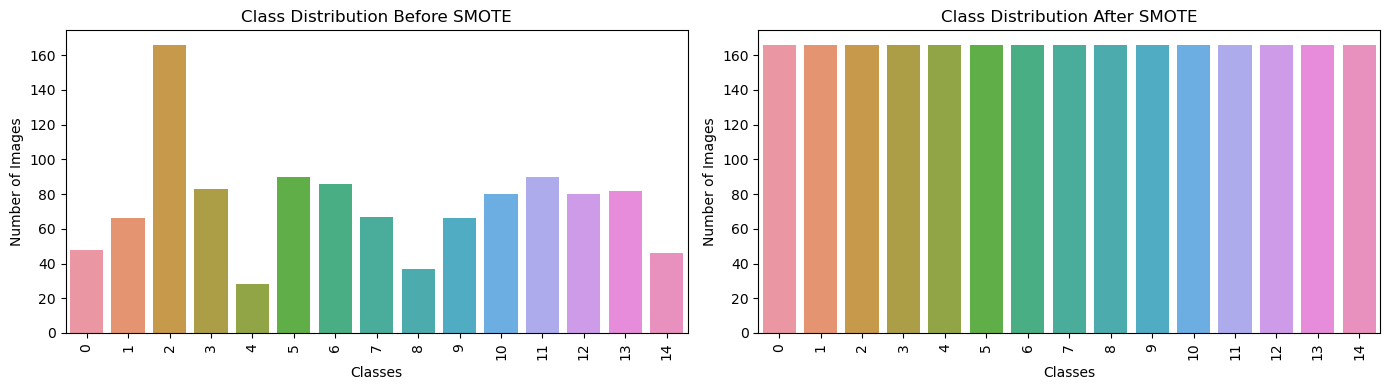

In [43]:

plt.figure(figsize=(14, 4))

# Before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=train_image_df['Encoded_Label'])
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.xticks(rotation=90)

# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Ridge

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


param_grid_ridge = {
    'alpha': [0.1, 1.0, 10], 
    'solver': ['auto', 'svd', 'cholesky', 'lsqr'],  
    'max_iter': [200, 300, 500]
}


ridge = RidgeClassifier(random_state=42)


grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=2, scoring='accuracy', n_jobs=-1)


grid_search_ridge.fit(X_train_vgg_resampled, y_train_resampled)


best_params_ridge = grid_search_ridge.best_params_
print("Best Hyperparameters for Ridge Classifier:", best_params_ridge)


best_ridge = RidgeClassifier(**best_params_ridge, random_state=42)
best_ridge.fit(X_train_vgg_resampled, y_train_resampled)


y_pred_ridge = best_ridge.predict(X_val_vgg)


accuracy_ridge = accuracy_score(val_image_df['Encoded_Label'], y_pred_ridge)
print(f"Ridge Classifier Accuracy with Tuned Hyperparameters: {accuracy_ridge * 100:.2f}%")


conf_matrix_ridge = confusion_matrix(val_image_df['Encoded_Label'], y_pred_ridge)
print("\nConfusion Matrix:\n", conf_matrix_ridge)


print("Classification Report (Validation):")
print(classification_report(val_image_df['Encoded_Label'], y_pred_ridge, target_names=label_encoder.classes_))


Best Hyperparameters for Ridge Classifier: {'alpha': 10, 'max_iter': 200, 'solver': 'lsqr'}
Ridge Classifier Accuracy with Tuned Hyperparameters: 68.11%

Confusion Matrix:
 [[22  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  8  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  1  0  0  0  0  0  0  0  0  0  1  0]
 [ 0 19  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  6  0  0 15  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 16  0  0  0  0  0  0  0  2  1  1  0]
 [ 0  0  0  0  1  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0 15  0  0  5  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  6  1  0  0  0  0  0]
 [ 0  0  0  1  0  0  1  0  0  2  1 14  0  0  0  0  1]
 [ 0  0  0  0  0  2  0  0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  1]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  1  0 

SVM

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

param_grid = {
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'max_iter': [1000, 1100]
}


svm = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=2, scoring='accuracy')

# Perform grid search on the resampled training data
grid_search.fit(X_train_vgg_resampled, y_train_resampled)

# Get  best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_svm = SVC(**best_params, random_state=42)
best_svm.fit(X_train_vgg_resampled, y_train_resampled)

# predictions on the validation set
y_pred_svm = best_svm.predict(X_val_vgg)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(val_image_df['Encoded_Label'], y_pred_svm)
print("SVM Accuracy with Tuned Hyperparameters:", val_accuracy)


conf_matrix = confusion_matrix(val_image_df['Encoded_Label'], y_pred_svm)
print("Confusion Matrix:\n", conf_matrix)

print("Classification Report (Validation):")
print(classification_report(val_image_df['Encoded_Label'], y_pred_svm, target_names=label_encoder.classes_))


C:\Users\Apollo Gadget\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Apollo Gadget\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Hyperparameters: {'kernel': 'linear', 'max_iter': 1000}
SVM Accuracy with Tuned Hyperparameters: 0.8817204301075269
Confusion Matrix:
 [[11  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  4  0  0  0  0  0  0  2  0  1  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 18  0  0  0  0  2  0  0  0]
 [ 0  0  1  1  0  0  0 13  0  0  0  2  0  0  0]
 [ 0  0  0  1  0  0  0  0  8  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  1  0  0  1]
 [ 0  0  1  1  0  0  1  0  0  1  0 19  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1 18  1  0]
 [ 0  0  1  0  0  0  0  1  0  0  0  2  0 16  0]
 [ 0  0  2  0  0  0  0  3  0  0  0  0  0  0  7]]
Classification Report (Validation):
                       precision    recall  f1-score   support

  Acherontia Westwood       0.92      0

RF

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


param_grid_rf = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [5, 10],    
    'min_samples_leaf': [2, 4]       
}


rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=2, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train_vgg_resampled, y_train_resampled)

best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest Classifier:", best_params_rf)

best_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf.fit(X_train_vgg_resampled, y_train_resampled)


y_pred_rf = best_rf.predict(X_val_vgg)


accuracy_rf = accuracy_score(val_image_df['Encoded_Label'].values, y_pred_rf)
print(f"Random Forest Classifier Accuracy with Tuned Hyperparameters: {accuracy_rf * 100:.2f}%")


confusion_rf = confusion_matrix(val_image_df['Encoded_Label'].values, y_pred_rf)
print("\nConfusion Matrix:\n", confusion_rf)

print("\nClassification Report (Validation):")
report_rf = classification_report(val_image_df['Encoded_Label'].values, y_pred_rf, target_names=label_encoder.classes_)
print(report_rf)


Best Hyperparameters for Random Forest Classifier: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Random Forest Classifier Accuracy with Tuned Hyperparameters: 86.74%

Confusion Matrix:
 [[11  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  4  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  1 18  0  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  1 14  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  8  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0 10  2  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 19  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  1  0 21  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  1  0  1 17  0  0]
 [ 0  0  0  0  0  0  1  0  0  2  0  4  0 13  0]
 [ 0  0  4  0  0  0  0  1  0  0  1  0  0  0  6]]

Classification Report (Validation):
                

KNN

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}


knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=2, scoring='accuracy', n_jobs=-1)


grid_search_knn.fit(X_train_vgg_resampled, y_train_resampled)

best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for KNN Classifier:", best_params_knn)


best_knn = KNeighborsClassifier(**best_params_knn)
best_knn.fit(X_train_vgg_resampled, y_train_resampled)


y_pred_knn = best_knn.predict(X_val_vgg)


accuracy_knn = accuracy_score(val_image_df['Encoded_Label'].values, y_pred_knn)
print(f"KNN Classifier Accuracy with Tuned Hyperparameters: {accuracy_knn * 100:.2f}%")


confusion_knn = confusion_matrix(val_image_df['Encoded_Label'].values, y_pred_knn)
print("\nConfusion Matrix:\n", confusion_knn)


report_knn = classification_report(val_image_df['Encoded_Label'].values, y_pred_knn, 
                                    target_names=label_encoder.classes_)
print("\nClassification Report:\n", report_knn)


Best Hyperparameters for KNN Classifier: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
KNN Classifier Accuracy with Tuned Hyperparameters: 79.57%

Confusion Matrix:
 [[10  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  2  3  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0 20  0  1  0  2  0  0  0  0  0]
 [ 1  0  0  2  0  0 15  0  0  1  0  0  1  1  0]
 [ 0  0  0  1  0  0  0 13  0  0  0  1  0  1  1]
 [ 0  0  0  1  0  0  0  0  7  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0  0  0 12  0  0  0  0  2]
 [ 0  0  0  4  0  0  0  0  0  1 10  1  0  0  4]
 [ 0  0  0  3  0  0  0  2  0  0  0 15  0  2  1]
 [ 0  0  0  0  0  0  0  0  0  2  0  0 14  3  1]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0 16  1]
 [ 0  0  0  1  0  0  0  2  0  0  0  0  0  0  9]]

Classification Report:
                        precision    recall  f1-score   support

  Acherontia Westwoo

NB

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}


nb = GaussianNB()


grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv=2, scoring='accuracy', n_jobs=-1)


grid_search_nb.fit(X_train_vgg_resampled, y_train_resampled)

best_params_nb = grid_search_nb.best_params_
print("Best Hyperparameters for Naive Bayes Classifier:", best_params_nb)

best_nb = GaussianNB(**best_params_nb)
best_nb.fit(X_train_vgg_resampled, y_train_resampled)


y_pred_nb_tuned = best_nb.predict(X_val_vgg)


accuracy_nb_tuned = accuracy_score(val_image_df['Encoded_Label'].values, y_pred_nb_tuned)
print(f"Accuracy of Naive Bayes with Tuned Hyperparameters: {accuracy_nb_tuned * 100:.2f}%")


confusion_nb_tuned = confusion_matrix(val_image_df['Encoded_Label'].values, y_pred_nb_tuned)
print("\nConfusion Matrix:\n", confusion_nb_tuned)

report_nb_tuned = classification_report(val_image_df['Encoded_Label'].values, y_pred_nb_tuned, 
                                        target_names=label_encoder.classes_)
print("\nClassification Report:\n", report_nb_tuned)


Best Hyperparameters for Naive Bayes Classifier: {'var_smoothing': 1e-06}
Accuracy of Naive Bayes with Tuned Hyperparameters: 73.12%

Confusion Matrix:
 [[ 9  0  1  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  1  0  1  1  0  0  0]
 [ 0  0  3  0  1  2  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 19  0  0  2  0  0  0  2  0  0]
 [ 1  0  0  0  0  0 16  0  0  1  0  1  1  1  0]
 [ 0  0  1  0  0  0  0 10  1  1  2  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  1  0  1  1  0  0]
 [ 0  0  0  0  0  0  1  0  1  7  0  0  5  0  2]
 [ 1  0  1  0  0  0  0  0  0  1 12  2  3  0  0]
 [ 0  0  1  0  0  2  3  0  1  0  0 15  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0 16  0  0]
 [ 1  0  0  0  0  0  3  0  1  1  0  0  1 13  0]
 [ 0  0  5  1  0  0  0  0  0  0  0  0  2  0  4]]

Classification Report:
                        precision    recall  f1-score   support

  Acherontia Westwood       0.75     

MLP

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


param_grid_mlp = {
    'hidden_layer_sizes': [(50, 50), (100, 100)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.001, 0.01],
    'learning_rate_init': [0.01, 0.1]
}


mlp = MLPClassifier(random_state=42, max_iter=1000, early_stopping=True, validation_fraction=0.1)


grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=2, scoring='accuracy', n_jobs=-1)


grid_search_mlp.fit(X_train_vgg_resampled, y_train_resampled)


best_params_mlp = grid_search_mlp.best_params_
print("Best Hyperparameters for MLP Classifier:", best_params_mlp)


best_mlp = MLPClassifier(**best_params_mlp, random_state=42, max_iter=1000, early_stopping=True, validation_fraction=0.1)
best_mlp.fit(X_train_vgg_resampled, y_train_resampled)


y_pred_mlp_tuned = best_mlp.predict(X_val_vgg)


accuracy_mlp_tuned = accuracy_score(val_image_df['Encoded_Label'].values, y_pred_mlp_tuned)
print(f"\nMLP Classifier Accuracy with Tuned Hyperparameters: {accuracy_mlp_tuned:.4f}")


mlp_confusion_tuned = confusion_matrix(val_image_df['Encoded_Label'].values, y_pred_mlp_tuned)
print("\nMLP Confusion Matrix with Tuned Hyperparameters:\n", mlp_confusion_tuned)


mlp_report_tuned = classification_report(val_image_df['Encoded_Label'].values, y_pred_mlp_tuned, 
                                         target_names=label_encoder.classes_)
print("\nMLP Classification Report with Tuned Hyperparameters:\n", mlp_report_tuned)


Best Hyperparameters for MLP Classifier: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01}

MLP Classifier Accuracy with Tuned Hyperparameters: 0.8566

MLP Confusion Matrix with Tuned Hyperparameters:
 [[11  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  4  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0 22  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0 19  0  0  0  0  0  1  0  0]
 [ 0  0  1  1  0  0  1 13  0  0  0  1  0  0  0]
 [ 0  1  0  0  0  0  0  0  8  0  0  0  0  0  0]
 [ 0  1  3  0  0  0  0  1  0 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 18  1  0  0  0]
 [ 0  0  1  0  0  0  2  0  1  1  0 17  1  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0 18  0  0]
 [ 0  0  2  0  0  0  1  0  0  1  0  1  2 13  0]
 [ 0  0  1  0  0  0  0  4  0  0  0  0  0  0  7]]

MLP Classification Repor

ET

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


param_grid_et = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False]
}


et = ExtraTreesClassifier(n_estimators=100, random_state=42)


grid_search_et = GridSearchCV(estimator=et, param_grid=param_grid_et, cv=2, scoring='accuracy', n_jobs=-1)


grid_search_et.fit(X_train_vgg_resampled, y_train_resampled)


best_params_et = grid_search_et.best_params_
print("Best Hyperparameters for Extra Trees Classifier:", best_params_et)


best_et = ExtraTreesClassifier(n_estimators=100, random_state=42, **best_params_et)
best_et.fit(X_train_vgg_resampled, y_train_resampled)


y_pred_et = best_et.predict(X_val_vgg)


accuracy_et = accuracy_score(val_image_df['Encoded_Label'], y_pred_et)
print("\nExtra Trees Classifier Accuracy with Tuned Hyperparameters:", accuracy_et)


extra_trees_confusion = confusion_matrix(val_image_df['Encoded_Label'], y_pred_et)
extra_trees_report = classification_report(val_image_df['Encoded_Label'], y_pred_et,
                                           target_names=label_encoder.classes_)

print("\nExtra Trees Confusion Matrix with Tuned Hyperparameters:\n", extra_trees_confusion)
print("\nExtra Trees Classification Report with Tuned Hyperparameters:\n", extra_trees_report)


Best Hyperparameters for Extra Trees Classifier: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}

Extra Trees Classifier Accuracy with Tuned Hyperparameters: 0.8781362007168458

Extra Trees Confusion Matrix with Tuned Hyperparameters:
 [[11  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  1 17  0  0  0  0  2  0  0  0]
 [ 0  0  0  2  0  0  0 13  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 17  2  0  0  0]
 [ 0  0  0  0  0  1  0  1  0  1  0 20  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0 19  0  0]
 [ 0  0  0  0  0  0  1  0  0  1  1  2  2 13  0]
 [ 0  0  0  1  0  0  0  4  0  1  1  0  0  0  5]]

Ext

Ensemble

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np


X_ensemble = np.column_stack((
    y_pred_svm,
    y_pred_rf,
    y_pred_knn,
    y_pred_nb_tuned,
    y_pred_mlp_tuned,
    y_pred_et
))


param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


base_meta_model = RandomForestClassifier(random_state=42)


tuner = GridSearchCV(estimator=base_meta_model, param_grid=param_grid_rf, 
                     scoring='accuracy', cv=3, n_jobs=-1)


tuner.fit(X_ensemble, val_image_df['Encoded_Label'].values)


best_params_rf = tuner.best_params_
print("Best Hyperparameters for Meta RandomForest Classifier:", best_params_rf)


meta_model_tuned = RandomForestClassifier(**best_params_rf, random_state=42)
meta_model_tuned.fit(X_ensemble, val_image_df['Encoded_Label'].values)


y_pred_combined_tuned = meta_model_tuned.predict(X_ensemble)


accuracy_tuned = accuracy_score(val_image_df['Encoded_Label'].values, y_pred_combined_tuned)
print(f"Tuned Combined Classifier Accuracy: {accuracy_tuned * 100:.2f}%")


confusion_tuned = confusion_matrix(val_image_df['Encoded_Label'].values, y_pred_combined_tuned)
report_tuned = classification_report(
    val_image_df['Encoded_Label'].values, 
    y_pred_combined_tuned, 
    target_names=label_encoder.classes_
)

print("\nConfusion Matrix:\n", confusion_tuned)
print("\nClassification Report:\n", report_tuned)

Best Hyperparameters for Meta RandomForest Classifier: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Combined Classifier Accuracy: 99.64%

Confusion Matrix:
 [[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 23  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0 19  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 12]]

Classification Report:
                        precisio